QSVM Accuracy: 0.95


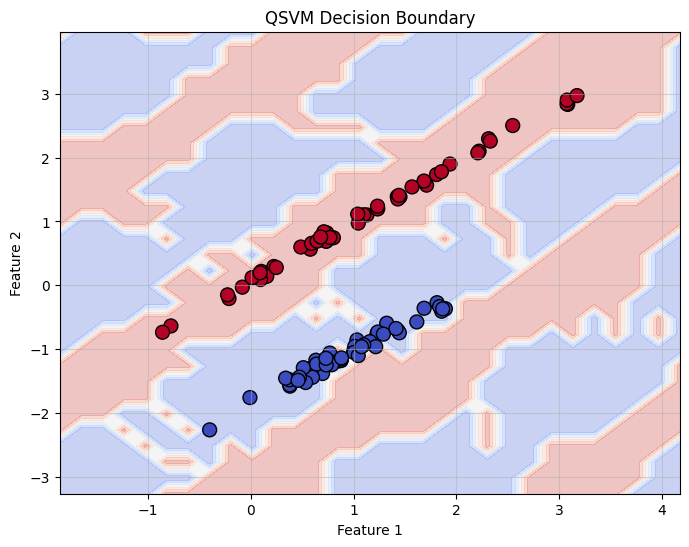

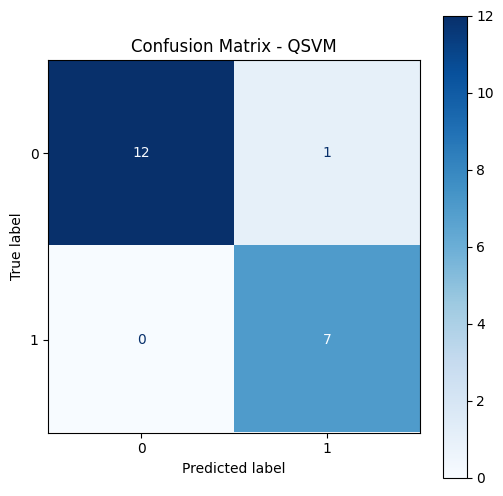

In [2]:
#-------------------------------------------------------------------------
# Quantum Support Vector Machines – QSVM  
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

from qiskit import Aer, QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC

#-------------------------------------------------------------------------
# Graphical Visualization Functions
#-------------------------------------------------------------------------

def plot_decision_boundary(model, X, y):
    """ Plot decision boundary """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                         np.linspace(y_min, y_max, 30))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k", s=100)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("QSVM Decision Boundary")
    plt.grid(alpha=0.5)
    plt.show()

# Plot Confusion Matrix
def plot_confusion(qsvc, X_test, y_test):
    """ Plot Confusion Matrix """
    y_pred = qsvc.predict(X_test)
    fig, ax = plt.subplots(figsize=(6,6))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", ax=ax)
    plt.title("Confusion Matrix - QSVM")
    plt.grid(False)
    plt.show()
#-------------------------------------------------------------------------

def feature_map(x):
    """ Define a quantum feature map """
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.rx(x[0], 0)
    qc.rx(x[1], 1)
    qc.cx(0, 1)
    return qc
#-------------------------------------------------------------------------

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split Test / Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a quantum kernel
feature_map = ZZFeatureMap(feature_dimension=2, reps=2)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=Aer.get_backend('aer_simulator'))
#quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=Aer.get_backend('aer_simulator'))

# Train QSVM
qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(X_train, y_train)

# Evaluate QSVM
accuracy = qsvc.score(X_test, y_test)
print("QSVM Accuracy:", accuracy)

# Execute visualization functions
plot_decision_boundary(qsvc, X, y)
plot_confusion(qsvc, X_test, y_test)
